# Suprevised Learning: Learn to predict target values from labelled data.
    - Classification(target values are discrete classes)
    - Regression(Target Values are continous Values)

For Ex: Training set( orange)

    classifier --> Future Sample --> Label:Orange

Types of labels for Classification: 
    - Explicit Label (Human Judges / Annotators)
    - Implicit Label (Clicking and reading the "Mackinac Island " result can be implicit label for the search engine
                     to learn that " Makinac Island" is especially relevant for the query for that specific user)

# Unsuprevised Learning: Find Structure in the unlabeled data
    - Find groups of similar instances in the data (Clutering)
    - finding unusual Patterns (Outlier Detectors)

A Basic Machine Learning workflow

Representation --> Evaluation --> Optimization

1. Represenation: 
                  - A feature representation
                  - Type of classifier Used

2. Evaluation: What criterion distinguishes good vs bad classifiers?

3. optimization: How to search for settings/parameters that give the best classifier for evaluation criterion

Feature representations

Email: a list of words with their frequency counts
    
Picture: A matrix of color values(pixels)
    
Sea Creatures: A set of attribute values

For example: IF we have to classify apple:
        
        fruit label, fruit name, fruit subtype are its label information
        
        Mass, width,height, color score are its feature representation
        

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [3]:
fruits.shape

(59, 7)

# Creating Training and Testing Sets

In [4]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
# creating split

In [6]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Examining the data

<IPython.core.display.Javascript object>


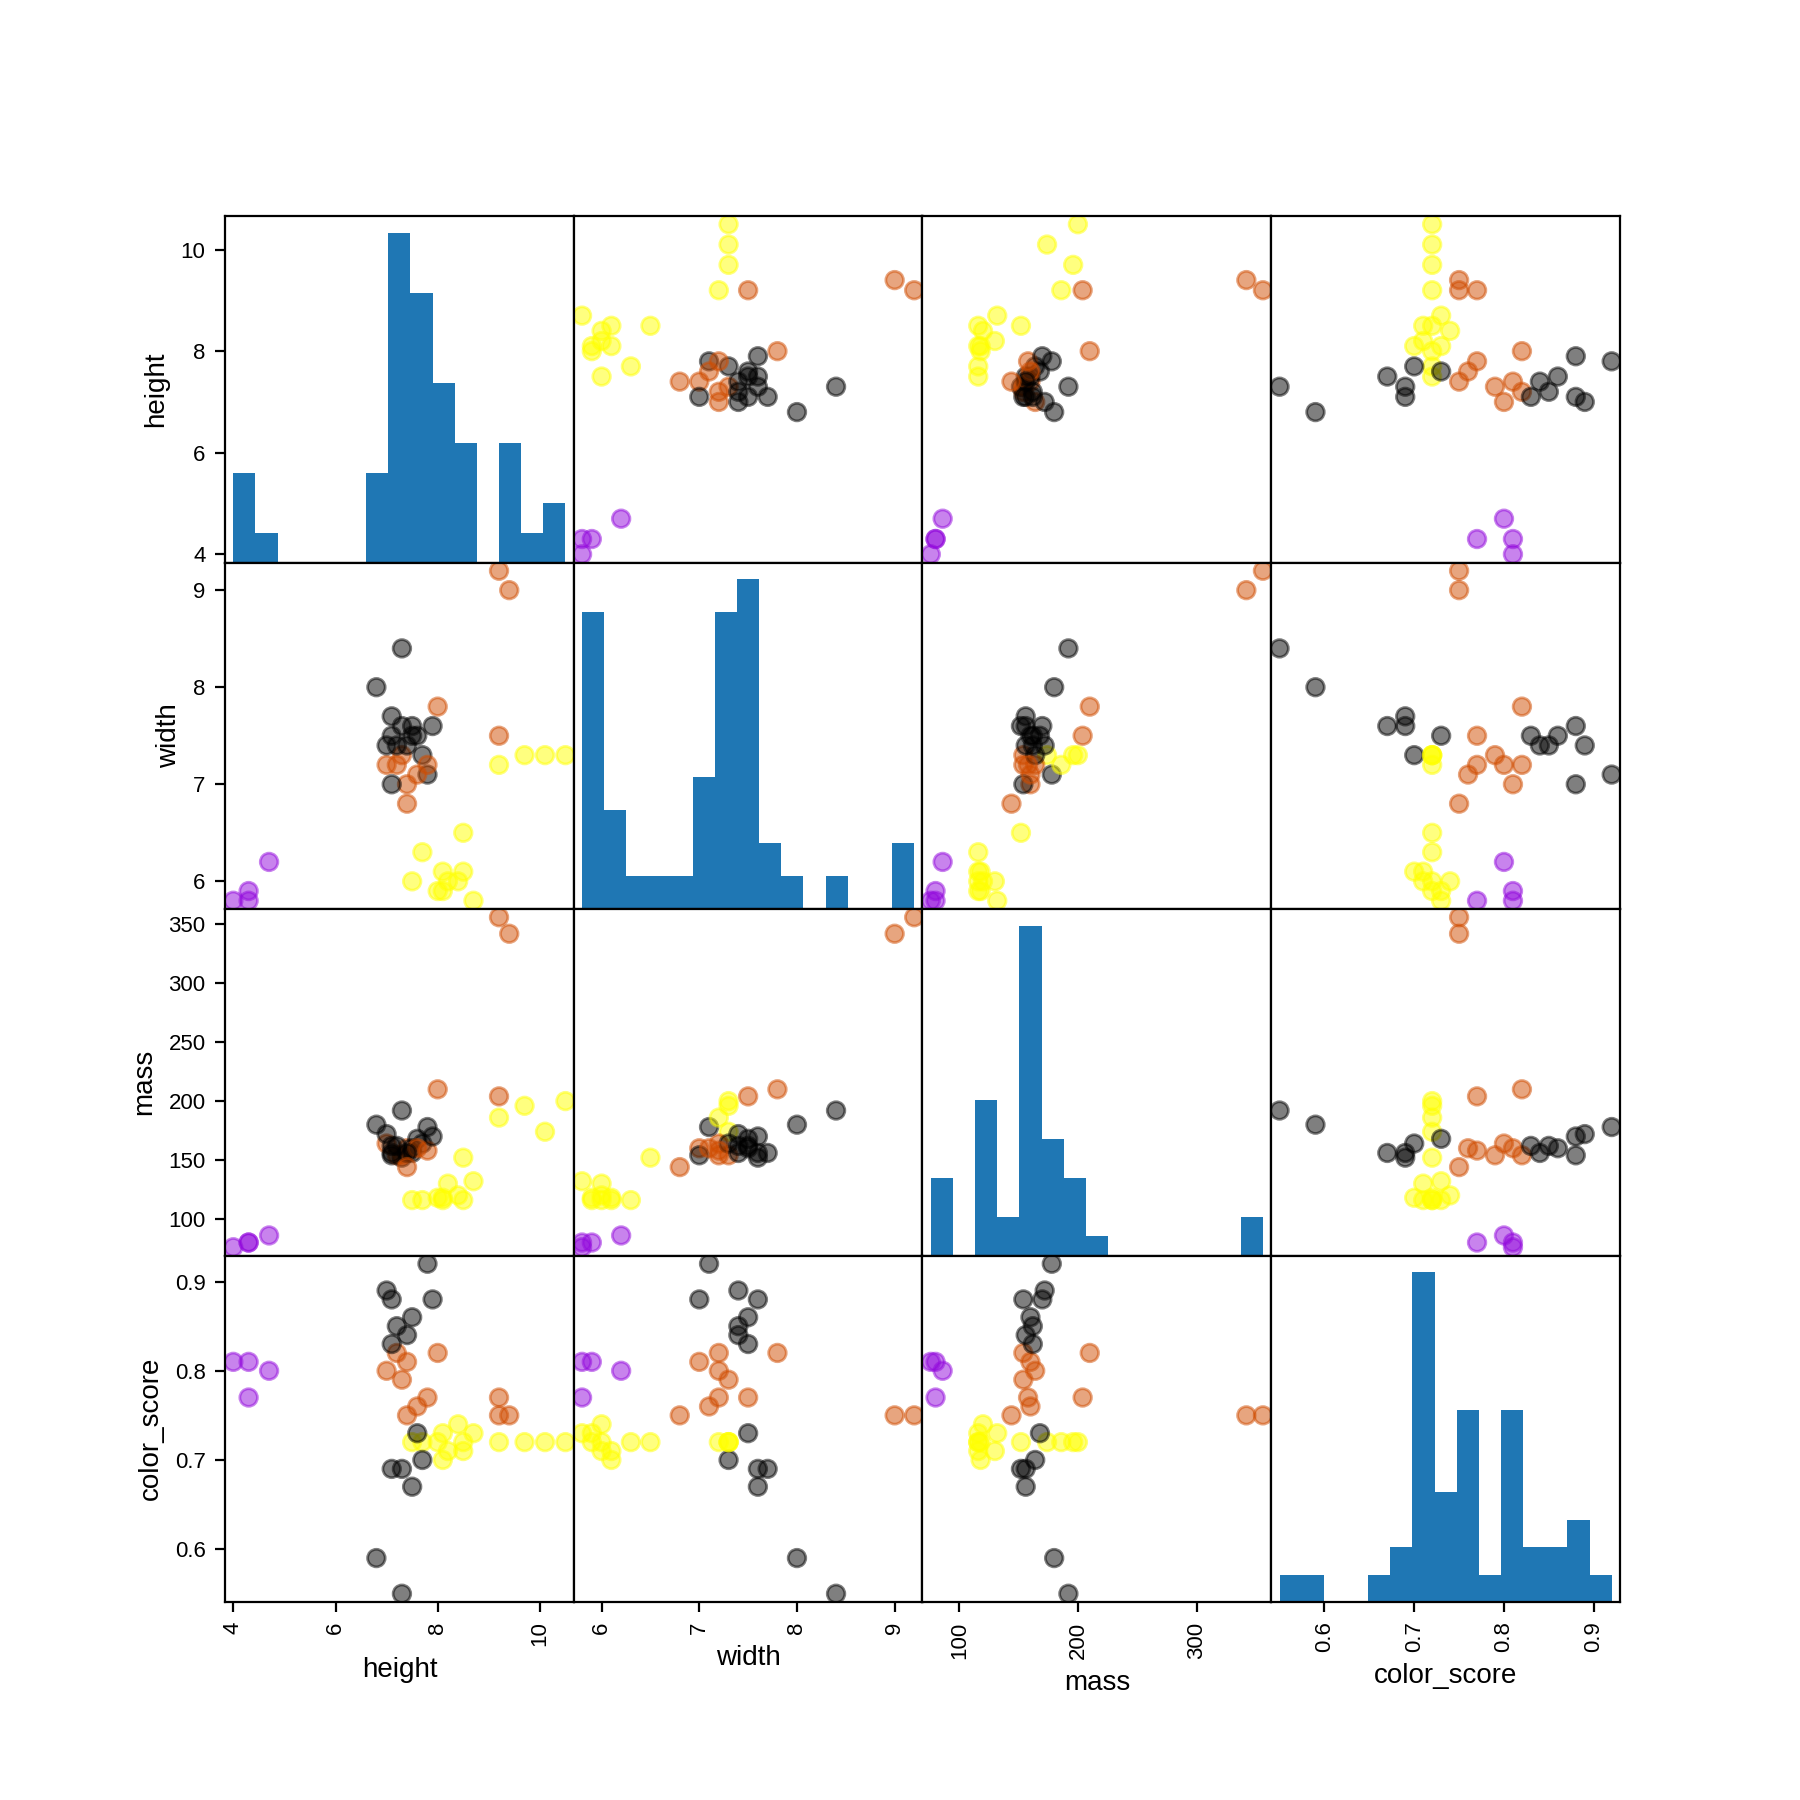

In [7]:
#plotting a scatter matrix
# feature pair plot
from matplotlib import cm
X = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train,c = y_train, marker = 'o', s = 40, hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)

<IPython.core.display.Javascript object>


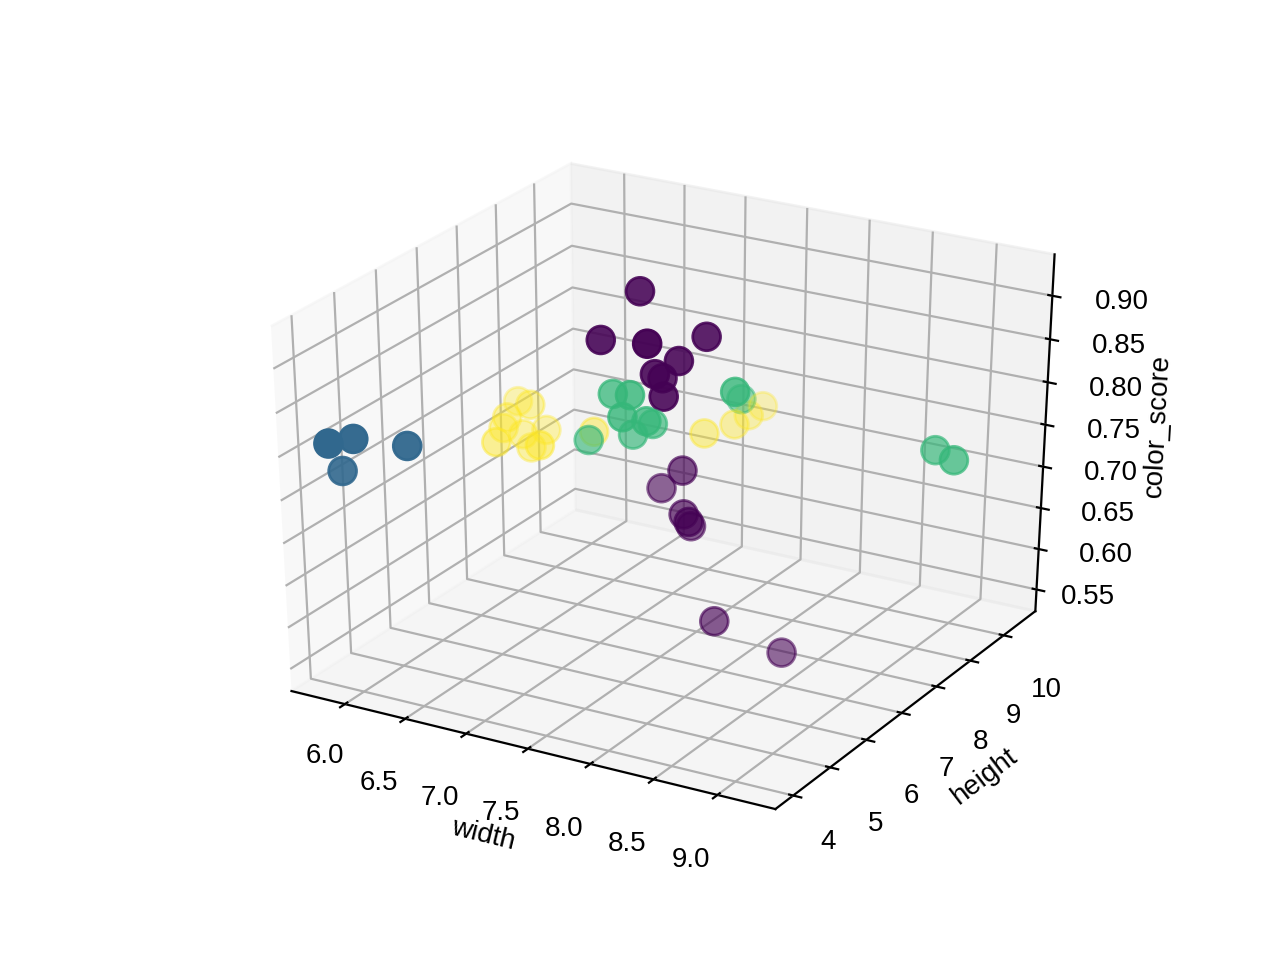

In [8]:
# Creating 3D feature plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'], c =y_train,marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()


# Create train-test split

In [9]:
# for this example, we use the mass,width, and height for each fruit instance
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

# default is 75% / 25% test-train split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# K-NN (K-nearest neighbor) algorithm


The K-Nearest Neighbors algorithm can be used for classification and regression. Though, here we'll be focus on using it for classification. K-NN classfiers are an example of what's called instance based or memory based suprevised learning. 
What's this means that instance based learning methods work by memorizing the label examples that see in the training set. And they use those memorized examples to classify new objects later.

# Create classifier object

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier(fit estimator) using the training data

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Estimating the accuracy of the classifier on future data, using the test data

In [12]:
knn.score(X_test,y_test)

0.53333333333333333

# Use the trained k-NN classifier model to classify new, previously unseen objects

In [13]:
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

# Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


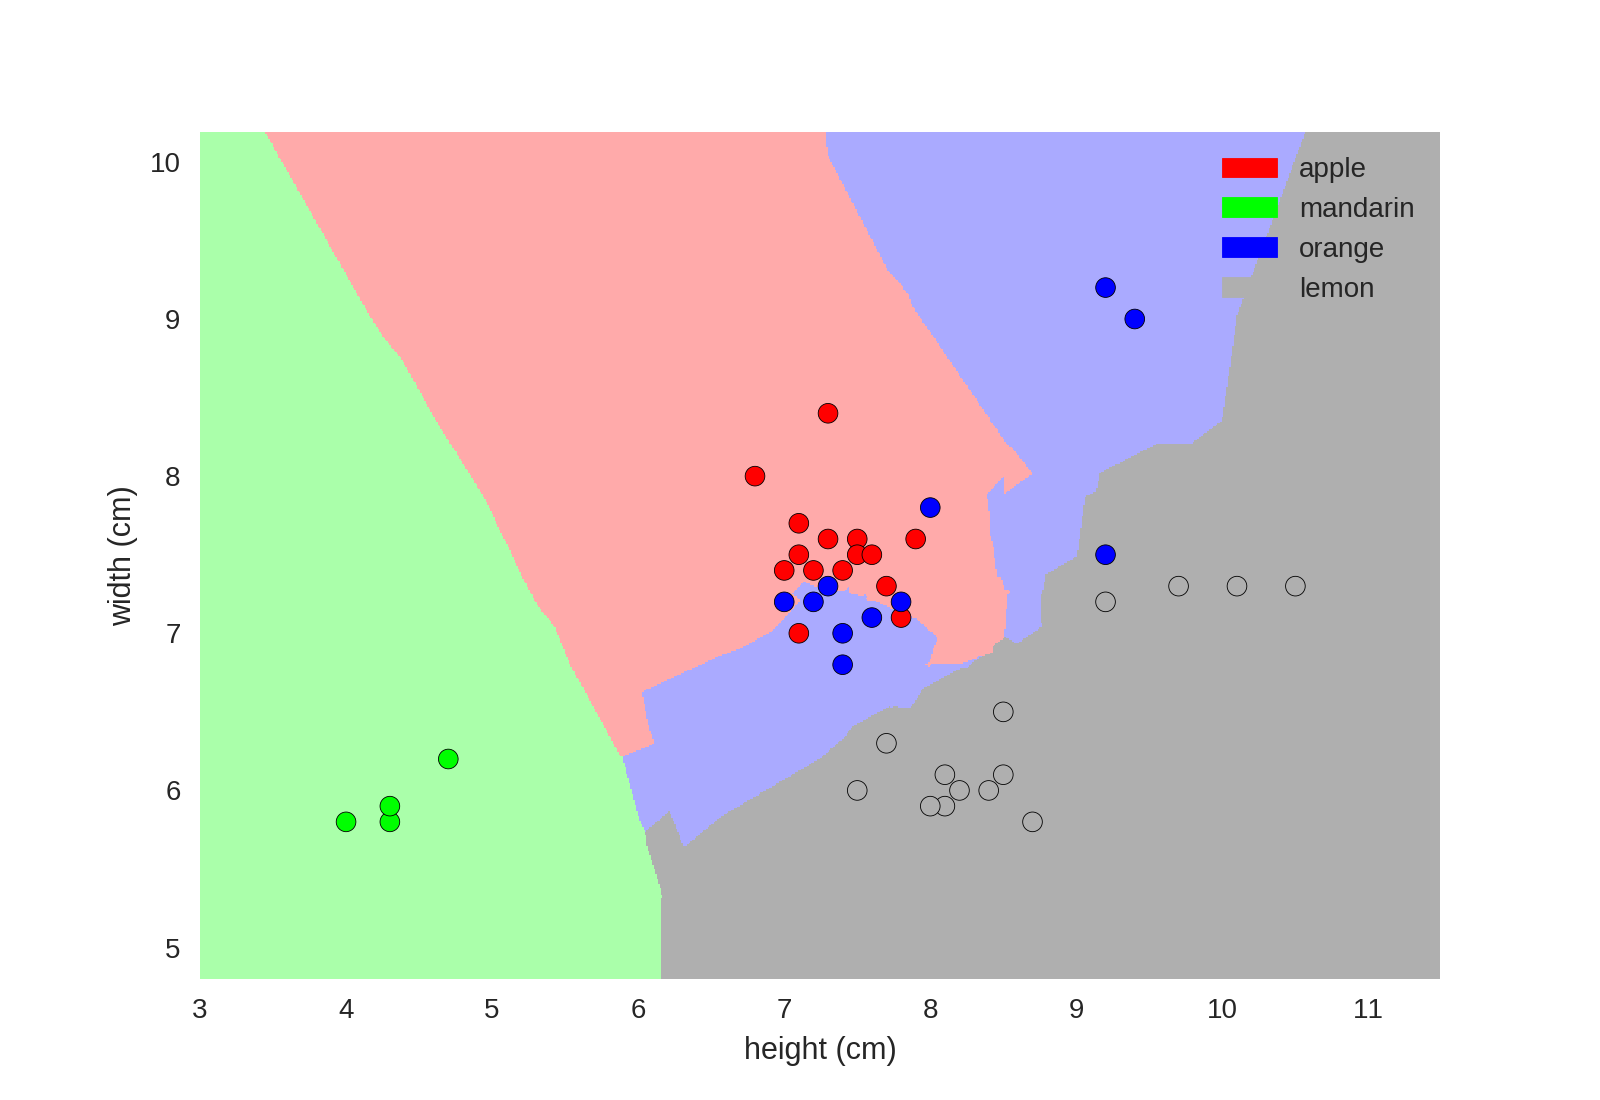

In [14]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train,y_train,5,'uniform')

# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter

<IPython.core.display.Javascript object>


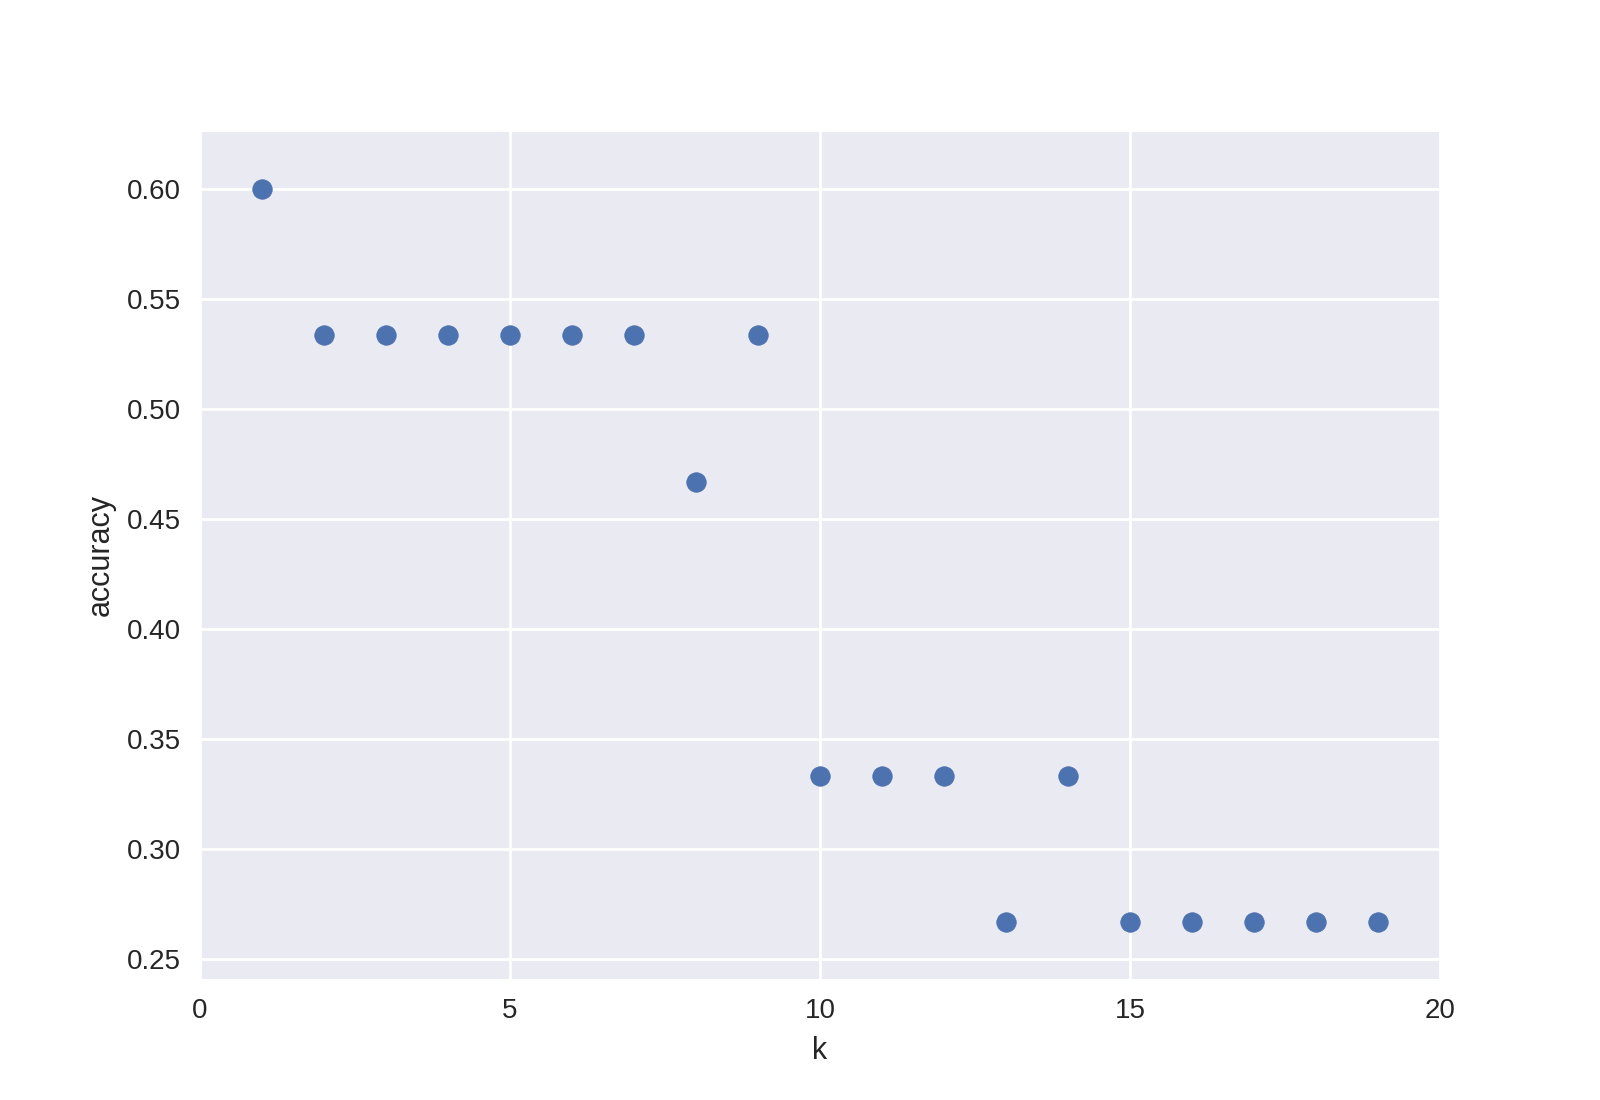

In [15]:
k_range = range(1,20)
scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20]);